Each year my friends and family do a College Football Bowl Pickem. I was interested to see how much we as a group match up to the spread that Vegas sets for each game. The spread was obtained from ESPN (which uses Caesars Sportsbook) several days prior to the start of bowl season.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
df = pd.read_excel('C:/Users/hases/Documents/Python Files/College Football Pickem/College Football Bowl Pickem 2021.xlsx')

df

,Team,Num_Pick,Spread,Conference
0,Toledo,19,-10.5,G5
1,Coastal Carolina,21,-12.0,G5
2,Appalachian State,21,-3.0,G5
3,Jackson State,18,-10.5,FCS
4,Fresno State,21,-11.5,G5
...,...,...,...,...
81,#5 Notre Dame,12,-2.0,IND
82,#15 Iowa,11,3.0,BIG10
83,#11 Utah,6,6.5,PAC12
84,#7 Baylor,11,0.0,BIG12


In [85]:
df['Num_Pick'] = ((df['Num_Pick']/25)*100)
df.Spread.dtype

dtype('float64')

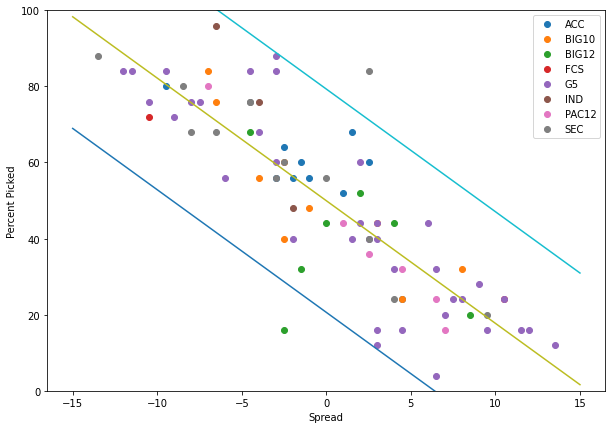

In [86]:
grouped = df.groupby('Conference')

for name, group in grouped:
        plt.plot(group.Spread, group.Num_Pick, marker = 'o', linestyle= 'None', label= name)
x = np.linspace(-15, 15, 20)
m, b= np.polyfit(df.Spread, df.Num_Pick, 1)
y = (m*x)+b
plt.plot(x, y)
plt.plot(x, (y + np.std(y)))
plt.plot(x, (y - np.std(y)))        
plt.legend()
plt.xlabel('Spread')
plt.ylabel('Percent Picked')
plt.ylim([0, 100])

plt.show()

We can see a strong correlation between the percent our group chose a team to win and how much they were favored by in the betting markets, with nearly all teams falling within one standard deviation. The outlier seen is the matchup between SEC team LSU and Big12 team Kansas State (perhaps some SEC bias in our group...).

In [88]:
correlation_matrix = np.corrcoef(df.Spread, df.Num_Pick)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("Correlation(r_squared): " + str(r_squared))

Correlation: 0.7196297495756028


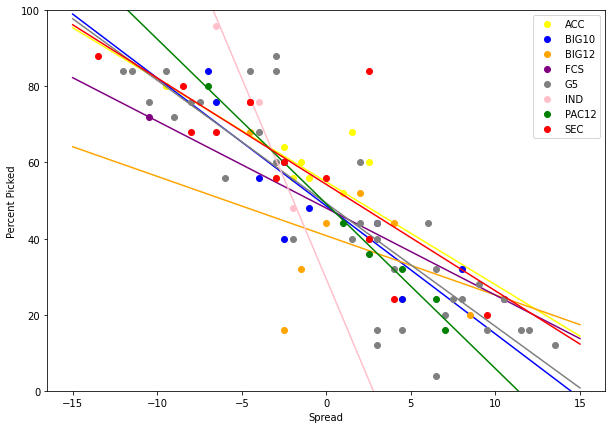

In [89]:
plt.clf()

x = np.linspace(-15, 15, 20)
c_list = ['Yellow', 'Blue', 'Orange', 'Purple', 'Grey', 'Pink', 'Green', 'Red']
conf_list = ['ACC', 'BIG10', 'BIG12', 'FCS', 'G5', 'IND', 'PAC12', 'SEC']
zip_object = zip(conf_list, c_list)

for conf, col in zip_object:
    df_conf = df[df['Conference'] == conf]
    plt.plot(df_conf.Spread, df_conf.Num_Pick, marker = 'o', linestyle= 'None', label = conf, color= col)
    m_1, b_1= np.polyfit(df_conf.Spread, df_conf.Num_Pick, 1)
    y_1 = (m_1*x)+b_1
    plt.plot(x, y_1, color=col)
plt.legend()
plt.xlabel('Spread')
plt.ylabel('Percent Picked')
plt.ylim([0, 100])
plt.show()


